In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [98]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('Social Media Ad Data.csv', header = 0)
df.head()
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [99]:

print('Gender', df['Gender'].unique())
print('Purchased', df['Purchased'].unique())


Gender ['Male' 'Female']
Purchased [0 1]


In [100]:

df.loc[df['Gender'] == 'Male', 'M'] = 1
df.loc[df['Gender'] == 'Female', 'M'] = 0
df.loc[df['Gender'] == 'Female', 'F'] = 1
df.loc[df['Gender'] == 'Male', 'F'] = 0


#df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df.head(10)


,User ID,Gender,Age,EstimatedSalary,Purchased,M,F
0,15624510,Male,19,19000,0,1.0,0.0
1,15810944,Male,35,20000,0,1.0,0.0
2,15668575,Female,26,43000,0,0.0,1.0
3,15603246,Female,27,57000,0,0.0,1.0
4,15804002,Male,19,76000,0,1.0,0.0
5,15728773,Male,27,58000,0,1.0,0.0
6,15598044,Female,27,84000,0,0.0,1.0
7,15694829,Female,32,150000,1,0.0,1.0
8,15600575,Male,25,33000,0,1.0,0.0
9,15727311,Female,35,65000,0,0.0,1.0


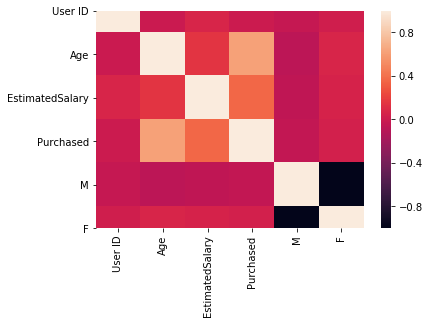

In [111]:
import seaborn as sns

Var_Corr = df.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=False)

In [112]:
y = df[['Purchased']]
#X = data.drop(['Purchased','User ID'], axis=1)
X = df.drop(['Purchased','Gender','User ID'], axis=1)


from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_X = scaler.fit_transform(X)
print(scaled_X.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42,stratify =y)

print(X_train.shape, y_train.shape)
from sklearn.metrics import accuracy_score
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy',splitter ='best',min_samples_split = 2)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))



(400, 4)
(320, 4) (320, 1)
Accuracy: 88.75%


In [113]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('Confusion Matrix:\n\n',confusion_matrix(y_test, y_pred))
print('Classification report:\n\n', classification_report(y_test, y_pred))

Confusion Matrix:

 [[45  6]
 [ 3 26]]
Classification report:

               precision    recall  f1-score   support

           0       0.94      0.88      0.91        51
           1       0.81      0.90      0.85        29

    accuracy                           0.89        80
   macro avg       0.88      0.89      0.88        80
weighted avg       0.89      0.89      0.89        80



True

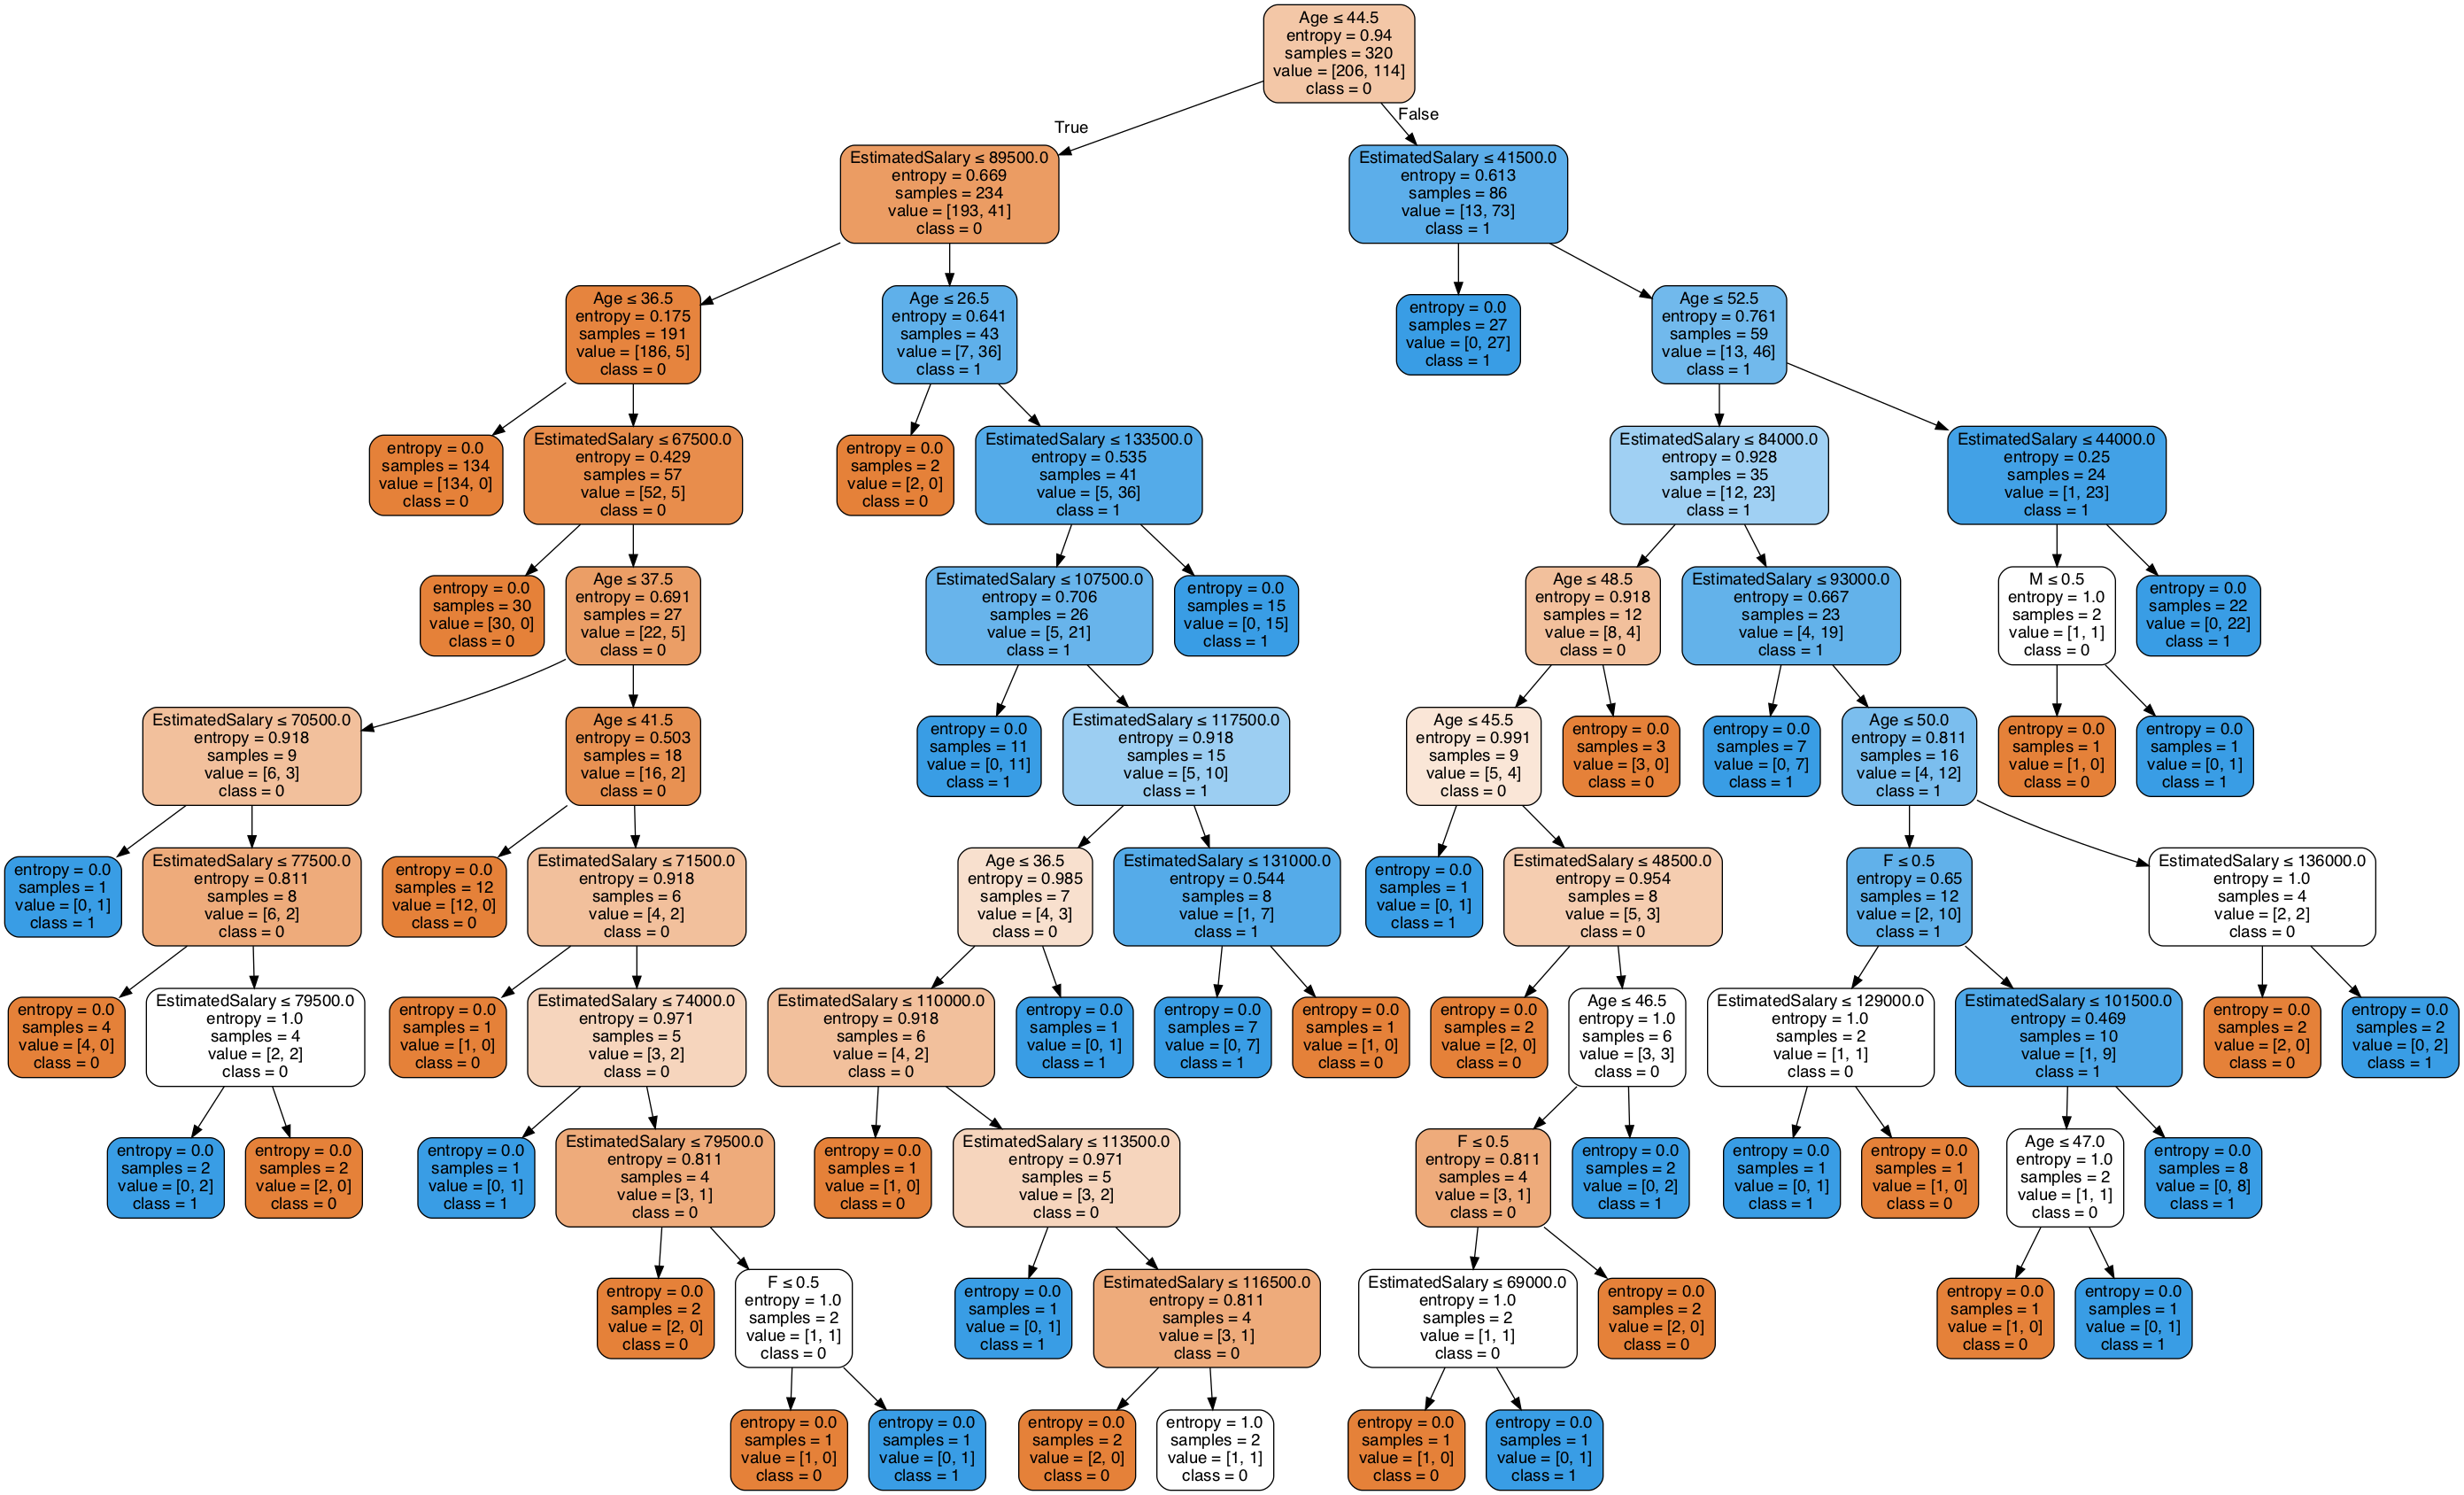

In [114]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True ,rounded=True,
                special_characters=True, feature_names = list(X.columns),class_names= ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('purchase.png')
Image(graph.create_png())

Accuracy: 88.75%


True

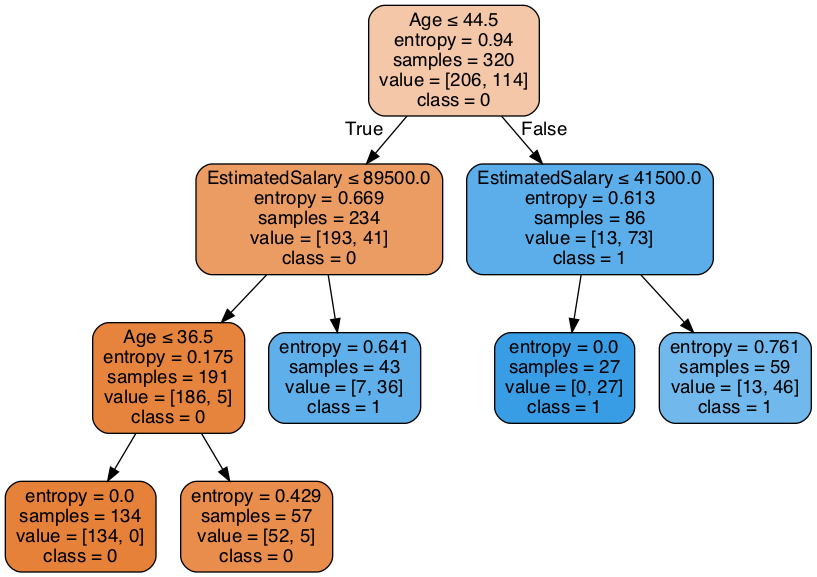

In [117]:
#with pruning which shows that just age and estimated salary features are needed to predict wuth same accuracy.

from sklearn.metrics import accuracy_score
from sklearn import tree
clf_new = tree.DecisionTreeClassifier(criterion = 'entropy',splitter ='best',min_samples_split = 2,max_depth=5,
            max_features=None, max_leaf_nodes=5, min_samples_leaf=5)
clf_new = clf_new.fit(X_train, y_train)

y_pred_new = clf_new.predict(X_test)

print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred_new) * 100))

dot_data = StringIO()
export_graphviz(clf_new, out_file=dot_data,
                filled=True ,rounded=True,
                special_characters=True, feature_names = list(X.columns),class_names= ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('purchase_prune.png')
Image(graph.create_png())